# Decision Regression Tree

In [100]:
import sklearn.model_selection as skm
(X_train, X_test, y_train, y_test) = skm.train_test_split(data.drop(['log_price','price'], axis=1),
                                                          data['log_price'],
                                                          test_size=0.2,
                                                          random_state=0)
feature_names = X_train.columns

In [138]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [139]:
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
np.mean((y_train - reg.predict(X_train))**2)
print("Train MSE Obtained:", np.mean((y_train - reg.predict(X_train))**2))

Train MSE Obtained: 0.251249231871528


In [140]:
np.mean((y_test - reg.predict(X_test))**2)
print("Test MSE Obtained:", np.mean((y_test - reg.predict(X_test))**2))

Test MSE Obtained: 0.25790393392363675


In [141]:
from matplotlib.pyplot import subplots

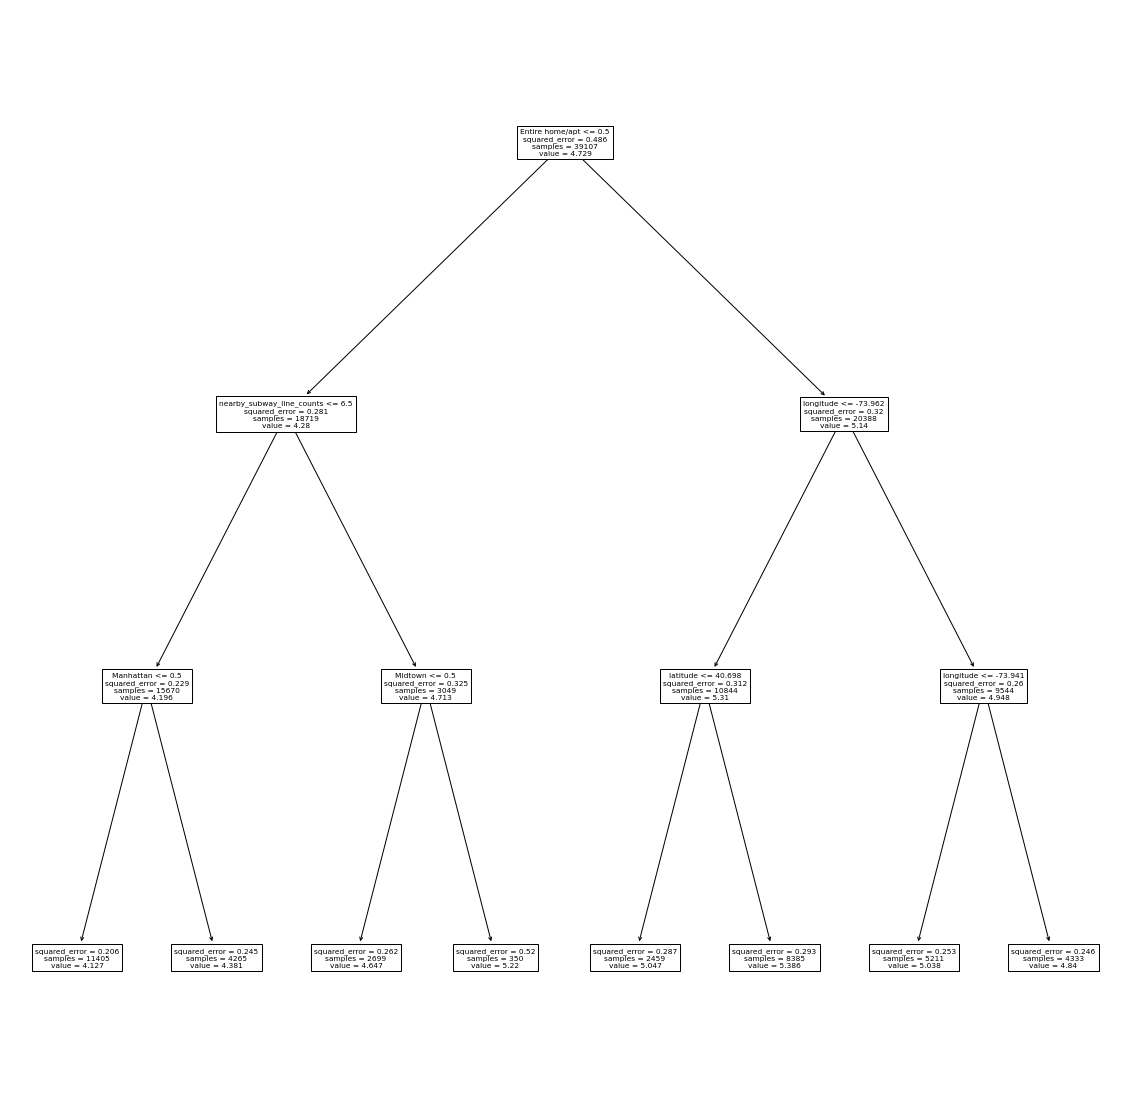

In [142]:
ax = subplots(figsize=(20,20))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);

In [147]:
feature_imp = pd.DataFrame({'importance': reg.feature_importances_}, index=feature_names)
feature_imp_sorted = feature_imp.sort_values(by='importance', ascending=False)
top_10_features = feature_imp_sorted.head(10)
print("Top 10 Most Important Features:")
print(top_10_features)

Top 10 Most Important Features:
                           importance
Entire home/apt              0.786574
longitude                    0.082493
nearby_subway_line_counts    0.074174
latitude                     0.023872
Manhattan                    0.021769
Midtown                      0.011117
NoHo                         0.000000
Oakwood                      0.000000
Norwood                      0.000000
North Riverdale              0.000000


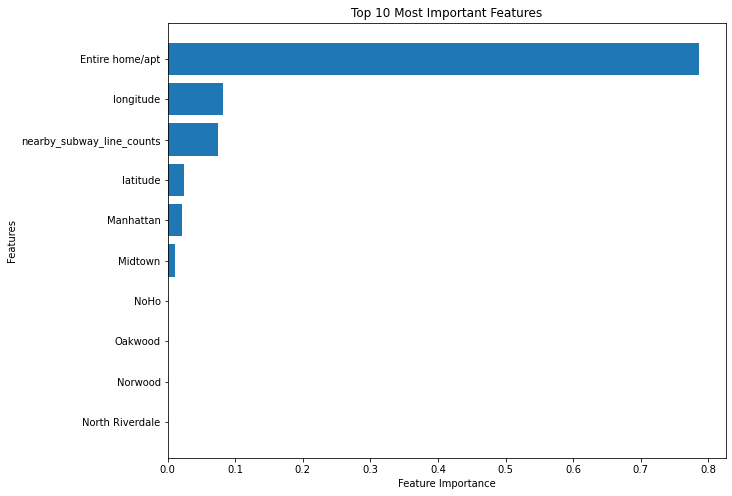

In [150]:
import matplotlib.pyplot as plt
feature_imp_sorted = feature_imp_sorted[::-1]
top_10_features = feature_imp_sorted.tail(10)
plt.figure(figsize=(10, 8))
plt.barh(top_10_features.index, top_10_features['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features')
plt.show()

In [104]:
from sklearn.model_selection import KFold, GridSearchCV
import numpy as np

In [152]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40, 50]
}

reg = DTR()

kf = KFold(n_splits=5, shuffle=True, random_state=10)

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

print("Best max_depth:", best_max_depth)
print("Best min_samples_split:", best_min_samples_split)
print("Best min_samples_leaf:", best_min_samples_leaf)

Best max_depth: 10
Best min_samples_split: 10
Best min_samples_leaf: 30


In [154]:
reg = DTR(max_depth=10, min_samples_split=10, min_samples_leaf=30)
reg.fit(X_train, y_train)

mse_test = np.mean((y_train - reg.predict(X_train))**2)
print("Train MSE:", mse_test)

Train MSE: 0.1888019049234338


In [155]:
mse_test = np.mean((y_test - reg.predict(X_test))**2)
print("Test MSE:", mse_test)

Test MSE: 0.21295979454894307


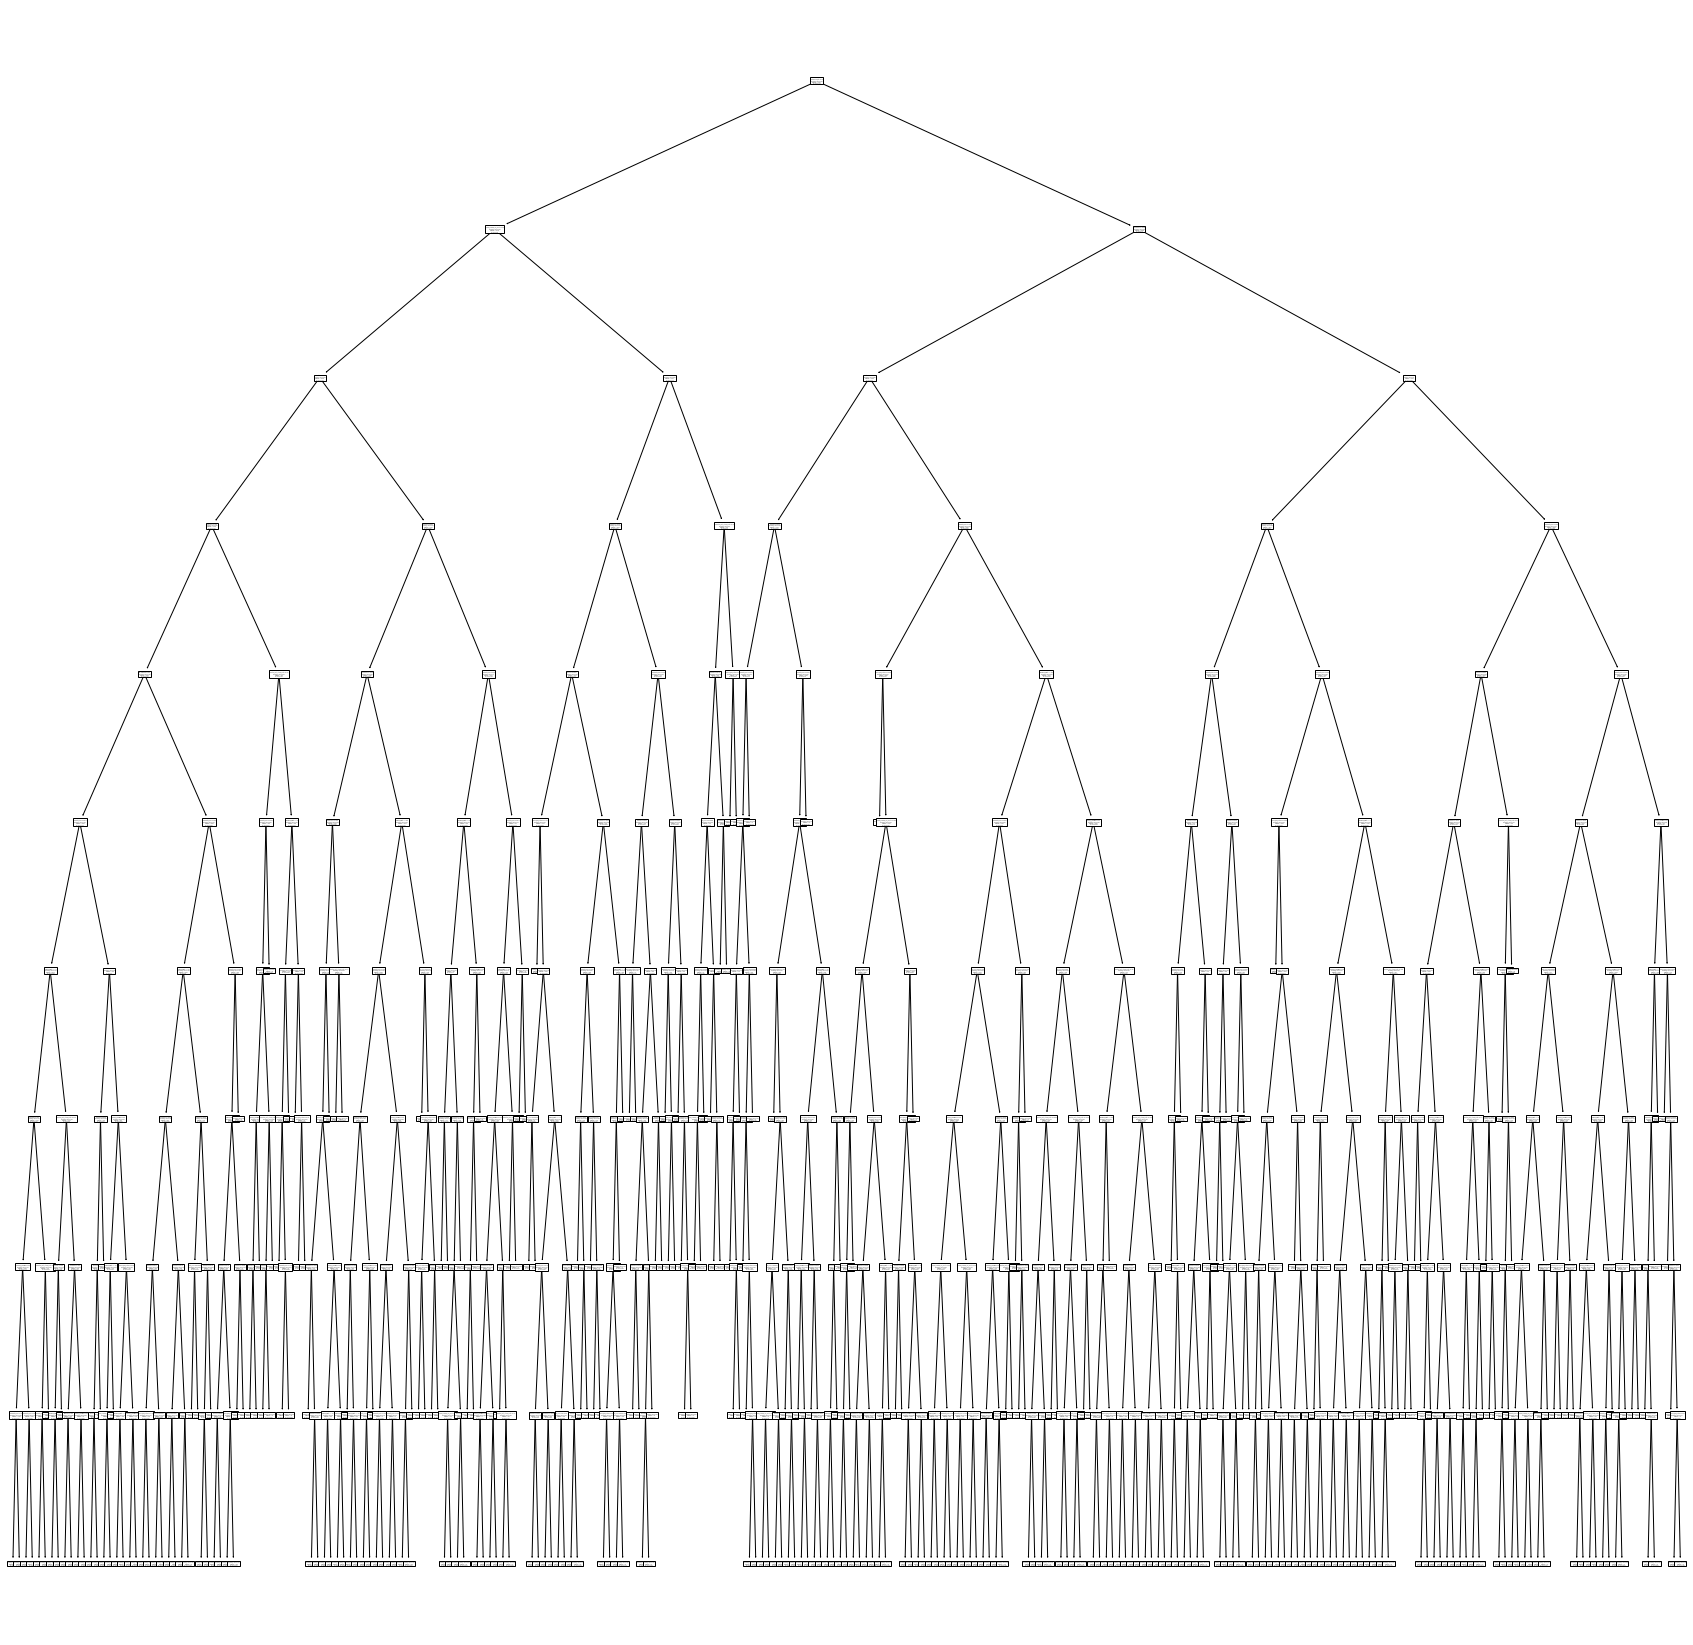

In [156]:
ax = subplots(figsize=(30,30))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);

In [167]:
feature_imp = pd.DataFrame({'importance': reg.feature_importances_}, index=feature_names)
feature_imp_sorted = feature_imp.sort_values(by='importance', ascending=False)
top_15_features = feature_imp_sorted.head(15)
print("Most Important Features:")
print(top_15_features)

Most Important Features:
                                importance
Entire home/apt                   0.621199
longitude                         0.084449
nearby_subway_line_counts         0.062283
latitude                          0.055434
availability_365                  0.047485
minimum_nights                    0.023315
Manhattan                         0.017192
number_of_reviews                 0.015822
calculated_host_listings_count    0.015443
reviews_per_month                 0.010609
Shared room                       0.010407
host_id                           0.009170
Midtown                           0.008780
Williamsburg                      0.006651
id                                0.006380


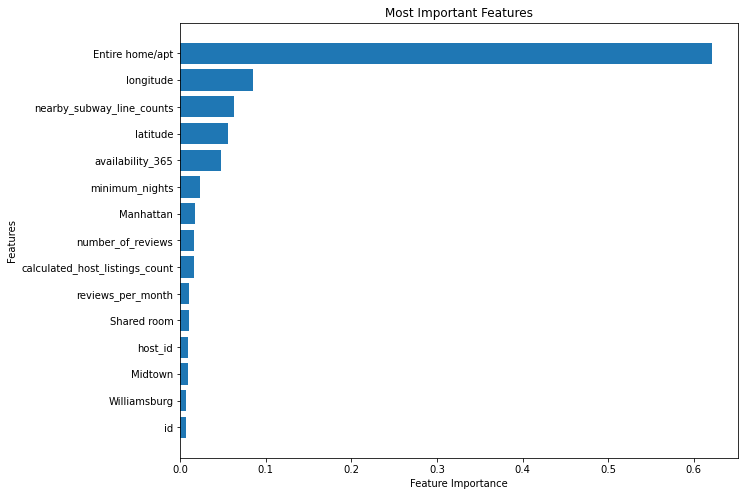

In [168]:
import matplotlib.pyplot as plt
feature_imp_sorted = feature_imp_sorted[::-1]
top_15_features = feature_imp_sorted.tail(15)
plt.figure(figsize=(10, 8))
plt.barh(top_15_features.index, top_15_features['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Most Important Features')
plt.show()